##### Ya los datos están limpios, ahora es tiempo de investigar las relaciones que hay entre las variables del dataset, ver si hay outliers o anomalías.


#### El Análisis exploratorio de los datos debe dar las elecciones a escojer las columnas que se utilizaran para crear los features para armar un sistema de recomendación y su correspondiente entrenamiento.

In [6]:
#importación  de librerias 
import json
import ast
import re
import gzip
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import pyarrow as pa
import pyarrow.parquet as pq


#### Analisis Exploratorio de Datos: Australian User Items

In [17]:
# cargha el dataset normalizado items 
articulos = pd.read_parquet("Data/australian_user_items.parquet")

articulos

,item_id,item_name,playtime_forever,playtime_2weeks,steam_id,items_count,user_id,user_url
0,10,Counter-Strike,6,0,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...
1,20,Team Fortress Classic,0,0,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...
2,30,Day of Defeat,7,0,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...
3,40,Deathmatch Classic,0,0,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...
4,50,Half-Life: Opposing Force,0,0,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...
...,...,...,...,...,...,...,...,...
5094100,346330,BrainBread 2,0,0,76561198329548331,7,76561198329548331,http://steamcommunity.com/profiles/76561198329...
5094101,373330,All Is Dust,0,0,76561198329548331,7,76561198329548331,http://steamcommunity.com/profiles/76561198329...
5094102,388490,One Way To Die: Steam Edition,3,3,76561198329548331,7,76561198329548331,http://steamcommunity.com/profiles/76561198329...
5094103,521570,You Have 10 Seconds 2,4,4,76561198329548331,7,76561198329548331,http://steamcommunity.com/profiles/76561198329...


In [18]:
# Muestra información general sobre el DataFrame 'articulos', incluyendo
# el número de filas, columnas, nombres de columnas, tipos de datos
# y la cantidad de memoria utilizada.

articulos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5094105 entries, 0 to 5094104
Data columns (total 8 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   item_id           int64 
 1   item_name         object
 2   playtime_forever  int64 
 3   playtime_2weeks   int64 
 4   steam_id          int64 
 5   items_count       int64 
 6   user_id           object
 7   user_url          object
dtypes: int64(5), object(3)
memory usage: 310.9+ MB


In [19]:
# Genera un resumen estadístico del DataFrame 'articulos', incluyendo
# estadísticas descriptivas como la media, desviación estándar,
# mínimo, percentiles 25, 50 (mediana), 75 y máximo para columnas numéricas.

articulos.describe()


,item_id,playtime_forever,playtime_2weeks,steam_id,items_count
count,5.094105e+06,5.094105e+06,5.094105e+06,5.094105e+06,5.094105e+06
mean,1.783916e+05,9.905511e+02,9.069004e+00,7.656120e+16,3.157324e+02
std,1.318516e+05,5.414297e+03,1.403145e+02,3.917652e+07,6.969073e+02
min,1.000000e+01,0.000000e+00,0.000000e+00,7.656120e+16,1.000000e+00
25%,3.445000e+04,0.000000e+00,0.000000e+00,7.656120e+16,7.100000e+01
50%,2.144200e+05,3.400000e+01,0.000000e+00,7.656120e+16,1.370000e+02
75%,2.664300e+05,3.550000e+02,0.000000e+00,7.656120e+16,2.750000e+02
max,5.307200e+05,6.427730e+05,1.996700e+04,7.656120e+16,7.762000e+03


In [20]:
# Comprueba la cantidad de valores nulos en cada columna del DataFrame 'articulos'.
# La función isnull() devuelve True para las celdas que contienen valores nulos y False para las que no.
# La función sum() suma los valores True, contando la cantidad de valores nulos por columna.

articulos.isnull().sum()


item_id             0
item_name           0
playtime_forever    0
playtime_2weeks     0
steam_id            0
items_count         0
user_id             0
user_url            0
dtype: int64

In [21]:
# Calcula la longitud del conjunto único de nombres de artículos en la columna "item_name" del DataFrame "articulos".
conteo_titulos = len(articulos["item_name"].unique())

# Imprime el resultado, que representa la cantidad de títulos únicos en la columna "item_name" del DataFrame "articulos".
conteo_titulos


10947

In [22]:
# Crea una Serie que contiene recuentos de la frecuencia de cada valor único en la columna "item_name" del DataFrame "articulos".
nombre_juegos = articulos["item_name"].value_counts()

# Imprime la Serie resultante, que muestra la frecuencia de cada nombre de juego en la columna "item_name".
nombre_juegos


item_name
Dota 2 Test                               49136
Counter-Strike: Global Offensive          43336
Garry's Mod                               42849
Unturned                                  38278
Left 4 Dead 2 Beta                        36661
                                          ...  
Preston Sterling                              1
Happy Town People                             1
Kapsul Infinite                               1
Warhammer 40,000: Armageddon - Da Orks        1
Arachnophobia                                 1
Name: count, Length: 10947, dtype: int64

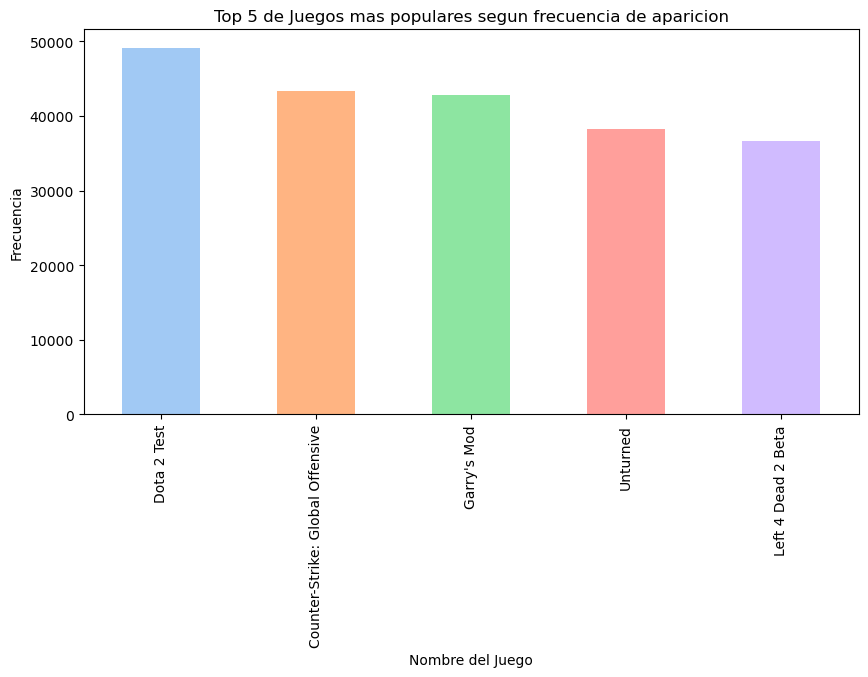

In [28]:
# Selecciona solo el top 5 de juegos con mayor frecuencia.
top5_juegos = nombre_juegos.head(5)

# Utiliza una paleta de colores diferente para cada barra.
colores = sns.color_palette("pastel", len(top5_juegos))

# Gráfico de barras con colores diferentes para cada barra.
plt.figure(figsize=(10, 5))
top5_juegos.plot(kind='bar', color=colores)
plt.title('Top 5 de Juegos mas populares segun frecuencia de aparicion')
plt.xlabel('Nombre del Juego')
plt.ylabel('Frecuencia')
plt.show()

In [29]:
# Agrupa el DataFrame 'articulos' por usuario y selecciona la columna 'items_count'.
# Luego, utiliza unique() para obtener una lista única de la cantidad de artículos para cada usuario.
# La función explode() convierte la lista resultante en una serie, asignando índices duplicados para cada elemento en la lista.

conteo_articulos = articulos.groupby('user_id')['items_count'].unique().explode()

# Convierte la serie resultante en un nuevo DataFrame llamado 'conteo_articulos'.
conteo_articulos = pd.DataFrame(conteo_articulos)

# Ordena el DataFrame 'conteo_articulos' por la columna 'items_count' de mayor a menor.
conteo_articulos_id = conteo_articulos.sort_values('items_count', ascending=False)

# Muestra el DataFrame resultante que contiene la cantidad de artículos única para cada usuario, ordenados de mayor a menor.
conteo_articulos_id


,items_count
user_id,
phrostb,7762
thugnificent,6700
chidvd,6410
piepai,6132
mayshowganmore,5027
...,...
76561198092978311,1
76561198092984441,1
76561198092985047,1


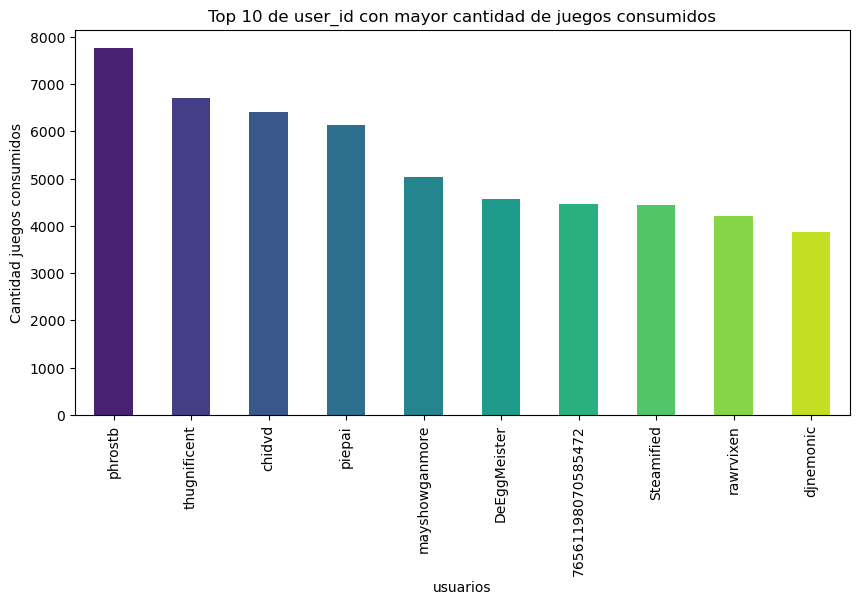

In [35]:


# Selecciona los 10 primeros usuarios con la mayor cantidad de artículos únicos.
top5_usuarios = conteo_articulos_id.head(10)

# Utiliza una paleta de colores diferente para cada barra.
colores = sns.color_palette("viridis", len(top5_usuarios))

# Gráfico de barras con colores diferentes para cada barra.
plt.figure(figsize=(10, 5))
top5_usuarios['items_count'].plot(kind='bar', color=colores)
plt.title('Top 10 de user_id con mayor cantidad de juegos consumidos')
plt.xlabel('usuarios')
plt.ylabel('Cantidad juegos consumidos')
plt.show()


In [36]:
conteo_articulos_id.describe()

,items_count
count,70912
unique,924
top,1
freq,3303


#### La cantidad total de Items o juegos consumidos es de 70912:

Esto indica que, en el conjunto de datos, hay un total de 70,912 items o juegos que han sido consumidos por los usuarios.
El valor que se repite con mayor frecuencia (3303 veces) es de 1:

Este valor indica que el "1" es el item o juego que más se repite en el conjunto de datos. Aparece 3,303 veces, lo que sugiere que es muy común o popular entre los usuarios.
El user_id con más cantidad de juegos consumidos es phrostb con 7762, seguido de thugnificent con 6700:

Esto señala que el usuario con el identificador 'phrostb' tiene la mayor cantidad de juegos consumidos, con un total de 7,762 items o juegos. Le sigue el usuario 'thugnificent' con 6,700 items o juegos consumidos.
Esta información destaca a los usuarios que están más activos o han consumido más items en comparación con otros usuarios en el conjunto de datos.

#### Analisis Exploratorio de Datos: Australian User Review

In [2]:
# Carga del dataset normalizado user review

reseñas = pd.read_parquet("Data/australian_user_review.parquet")

reseñas

,user_id,user_url,funny,posted,last_edited,item_id,helpful,recommend,review
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,None,2011-11-05,None,1250,No ratings yet,True,Simple yet with great replayability. In my opi...
1,76561197970982479,http://steamcommunity.com/profiles/76561197970...,None,2011-07-15,None,22200,No ratings yet,True,It's unique and worth a playthrough.
2,76561197970982479,http://steamcommunity.com/profiles/76561197970...,None,2011-04-21,None,43110,No ratings yet,True,Great atmosphere. The gunplay can be a bit chu...
3,js41637,http://steamcommunity.com/id/js41637,None,2014-06-24,None,251610,15 of 20 people (75%) found this review helpful,True,I know what you think when you see this title ...
4,js41637,http://steamcommunity.com/id/js41637,None,2013-09-08,None,227300,0 of 1 people (0%) found this review helpful,True,For a simple (it's actually not all that simpl...
...,...,...,...,...,...,...,...,...,...
59156,Fuckfhaisjnsnsjakaka,http://steamcommunity.com/id/Fuckfhaisjnsnsjakaka,None,None,None,70,No ratings yet,True,a must have classic from steam definitely wort...
59157,3214213216,http://steamcommunity.com/id/3214213216,None,None,None,362890,No ratings yet,True,this game is a perfect remake of the original ...
59158,ChrisCoroner,http://steamcommunity.com/id/ChrisCoroner,1 person found this review funny,None,None,273110,1 of 2 people (50%) found this review helpful,True,had so much fun plaing this and collecting res...
59159,CaptainAmericaCw,http://steamcommunity.com/id/CaptainAmericaCw,None,None,None,730,No ratings yet,True,:D


In [44]:
# Muestra información sobre el DataFrame 'reseñas', incluyendo el tipo de datos y la cantidad de valores no nulos

reseñas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59161 entries, 0 to 59160
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      59161 non-null  object
 1   user_url     59161 non-null  object
 2   funny        8127 non-null   object
 3   posted       49070 non-null  object
 4   last_edited  6123 non-null   object
 5   item_id      59161 non-null  int64 
 6   helpful      59161 non-null  object
 7   recommend    59161 non-null  bool  
 8   review       59131 non-null  object
dtypes: bool(1), int64(1), object(7)
memory usage: 3.7+ MB


#### Se crea la columna: sentiment_analysis, para la consigna: def sentiment_analysis( empresa desarrolladora : str ): Según la empresa desarrolladora, se devuelve un diccionario con el nombre de la desarrolladora como llave y una lista con la cantidad total de registros de reseñas de usuarios que se encuentren categorizados con un análisis de sentimiento como valor.

#### Este código utiliza la biblioteca TextBlob para calcular la polaridad de cada comentario en la columna "review" y luego asigna una escala (0, 1, 2) basada en la polaridad.


In [3]:
# Crear una nueva columna 'sentiment_analysis' que contendrá la polaridad del análisis de sentimientos.
reseñas['sentiment_analysis'] = reseñas['review'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

# Función para asignar la escala definida (0, 1, 2) basada en la polaridad.
def asignar_escala(polaridad):
    if polaridad > 0:
        return 2  # Positivo
    elif polaridad == 0:
        return 1  # Neutral
    else:
        return 0  # Malo

# Aplicar la función a la columna 'sentiment_analysis' para obtener la escala de polaridad.
reseñas['sentiment_analysis'] = reseñas['sentiment_analysis'].apply(asignar_escala)

# Muestra el DataFrame resultante con la nueva columna de análisis de sentimientos.
reseñas

,user_id,user_url,funny,posted,last_edited,item_id,helpful,recommend,review,sentiment_analysis
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,None,2011-11-05,None,1250,No ratings yet,True,Simple yet with great replayability. In my opi...,2
1,76561197970982479,http://steamcommunity.com/profiles/76561197970...,None,2011-07-15,None,22200,No ratings yet,True,It's unique and worth a playthrough.,2
2,76561197970982479,http://steamcommunity.com/profiles/76561197970...,None,2011-04-21,None,43110,No ratings yet,True,Great atmosphere. The gunplay can be a bit chu...,2
3,js41637,http://steamcommunity.com/id/js41637,None,2014-06-24,None,251610,15 of 20 people (75%) found this review helpful,True,I know what you think when you see this title ...,2
4,js41637,http://steamcommunity.com/id/js41637,None,2013-09-08,None,227300,0 of 1 people (0%) found this review helpful,True,For a simple (it's actually not all that simpl...,0
...,...,...,...,...,...,...,...,...,...,...
59156,Fuckfhaisjnsnsjakaka,http://steamcommunity.com/id/Fuckfhaisjnsnsjakaka,None,None,None,70,No ratings yet,True,a must have classic from steam definitely wort...,2
59157,3214213216,http://steamcommunity.com/id/3214213216,None,None,None,362890,No ratings yet,True,this game is a perfect remake of the original ...,2
59158,ChrisCoroner,http://steamcommunity.com/id/ChrisCoroner,1 person found this review funny,None,None,273110,1 of 2 people (50%) found this review helpful,True,had so much fun plaing this and collecting res...,2
59159,CaptainAmericaCw,http://steamcommunity.com/id/CaptainAmericaCw,None,None,None,730,No ratings yet,True,:D,2


In [49]:
# Accede a la columna 'review' del DataFrame 'reseñas'

reseñas["review"]


0        Simple yet with great replayability. In my opi...
1                     It's unique and worth a playthrough.
2        Great atmosphere. The gunplay can be a bit chu...
3        I know what you think when you see this title ...
4        For a simple (it's actually not all that simpl...
                               ...                        
59156    a must have classic from steam definitely wort...
59157    this game is a perfect remake of the original ...
59158    had so much fun plaing this and collecting res...
59159                                                   :D
59160                                       so much fun :D
Name: review, Length: 59161, dtype: object

In [51]:
# Accede a la columna 'sentiment_analysis' del DataFrame 'reseñas'

reseñas["sentiment_analysis"]


0        2
1        2
2        2
3        2
4        0
        ..
59156    2
59157    2
59158    2
59159    2
59160    2
Name: sentiment_analysis, Length: 59161, dtype: int64

In [52]:
# Muestra información concisa sobre el DataFrame 'reseñas', incluyendo la cantidad de filas y columnas,
# los tipos de datos de cada columna, y la cantidad de valores no nulos.

reseñas.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59161 entries, 0 to 59160
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   user_id             59161 non-null  object
 1   user_url            59161 non-null  object
 2   funny               8127 non-null   object
 3   posted              49070 non-null  object
 4   last_edited         6123 non-null   object
 5   item_id             59161 non-null  int64 
 6   helpful             59161 non-null  object
 7   recommend           59161 non-null  bool  
 8   review              59131 non-null  object
 9   sentiment_analysis  59161 non-null  int64 
dtypes: bool(1), int64(2), object(7)
memory usage: 4.1+ MB


In [53]:
# Calcula la cantidad de valores nulos para cada columna en el DataFrame 'reseñas'.
# El método isnull() devuelve un DataFrame de booleanos indicando la presencia de valores nulos,
# y sum() agrega los True (1) para cada columna, proporcionando la cantidad total de valores nulos por columna.

reseñas.isnull().sum()


user_id                   0
user_url                  0
funny                 51034
posted                10091
last_edited           53038
item_id                   0
helpful                   0
recommend                 0
review                   30
sentiment_analysis        0
dtype: int64

In [54]:
# Elimina las columnas "funny" y "last_edited" del DataFrame 'reseñas'.
# El parámetro 'columns' especifica las columnas a eliminar, 'axis=1' indica que se trata de columnas,
# y 'inplace=True' modifica el DataFrame original en lugar de devolver uno nuevo.

reseñas.drop(columns=["funny", "last_edited"], axis=1, inplace=True)

# Muestra las primeras filas del DataFrame 'reseñas' después de la eliminación de las columnas.

reseñas.head()


,user_id,user_url,posted,item_id,helpful,recommend,review,sentiment_analysis
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,2011-11-05,1250,No ratings yet,True,Simple yet with great replayability. In my opi...,2
1,76561197970982479,http://steamcommunity.com/profiles/76561197970...,2011-07-15,22200,No ratings yet,True,It's unique and worth a playthrough.,2
2,76561197970982479,http://steamcommunity.com/profiles/76561197970...,2011-04-21,43110,No ratings yet,True,Great atmosphere. The gunplay can be a bit chu...,2
3,js41637,http://steamcommunity.com/id/js41637,2014-06-24,251610,15 of 20 people (75%) found this review helpful,True,I know what you think when you see this title ...,2
4,js41637,http://steamcommunity.com/id/js41637,2013-09-08,227300,0 of 1 people (0%) found this review helpful,True,For a simple (it's actually not all that simpl...,0


In [55]:
# Calcula la cantidad de usuarios únicos en la columna 'user_id' del DataFrame 'reseñas'.
# Utiliza el método unique() para obtener una lista única de valores de 'user_id' y len() para contar la longitud de la lista.

cantidad_usuarios = len(reseñas["user_id"].unique())

# Muestra la cantidad total de usuarios únicos en el conjunto de datos.

cantidad_usuarios



25467

In [56]:
# Calcula estadísticas descriptivas para la columna 'posted' del DataFrame 'reseñas'.
# El método describe() proporciona información como la cantidad, la media, la desviación estándar, el mínimo, los percentiles y el máximo.

fecha = reseñas["posted"].describe()

# Muestra las estadísticas descriptivas de la columna 'posted' del DataFrame 'reseñas'.

fecha


count          49070
unique          1644
top       2014-06-21
freq             224
Name: posted, dtype: object

In [57]:
# Convierte la columna 'posted' del DataFrame 'reseñas' a formato de fecha y hora utilizando pd.to_datetime().
# Esto es útil cuando se quiere trabajar con fechas y realizar operaciones específicas relacionadas con el tiempo.

reseñas["posted"] = pd.to_datetime(reseñas["posted"])


C:\Users\JAGER\AppData\Local\Temp\ipykernel_8860\3258414152.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=reseñas, x='mes', palette='plasma')


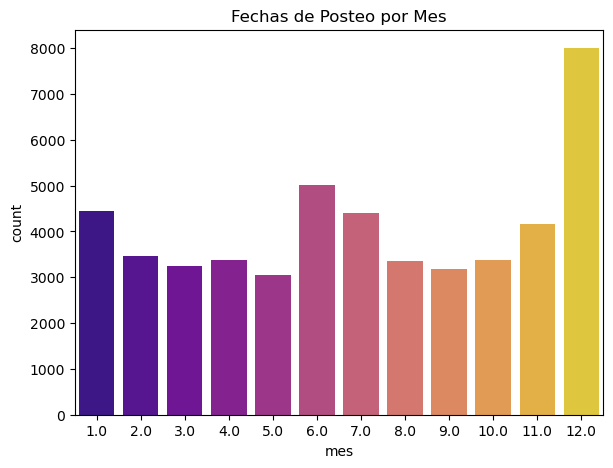

In [62]:
# Extrae el mes de la columna 'posted' y crea una nueva columna 'mes'.
# Esto te permitirá realizar análisis mensuales.

reseñas['mes'] = reseñas['posted'].dt.month

# Configura el tamaño de la figura para la visualización.

plt.figure(figsize=(15, 5))

# Subtrama 1: Histograma de las fechas de posteo por mes.

plt.subplot(1, 2, 1)
plt.title('Fechas de Posteo por Mes')
sns.countplot(data=reseñas, x='mes', palette='plasma')

# Muestra la figura.

plt.show()

#### Analisis Exploratorio de Datos: Steam Games

In [6]:
# se carga el dataset steam games

juegos = pd.read_parquet("Data/steam_games.parquet")

juegos

,genres,url,release_date,tags,reviews_url,discount_price,specs,price,early_access,id,metascore,Año_estreno,publisher,app_name,title,developer
0,Action,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"['Strategy', 'Action', 'Indie', 'Casual', 'Sim...",http://steamcommunity.com/app/761140/reviews/?...,4.49,['Single-player'],4.99,False,761140,NaN,2018,Kotoshiro,Lost Summoner Kitty,Lost Summoner Kitty,Kotoshiro
1,Casual,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"['Strategy', 'Action', 'Indie', 'Casual', 'Sim...",http://steamcommunity.com/app/761140/reviews/?...,4.49,['Single-player'],4.99,False,761140,NaN,2018,Kotoshiro,Lost Summoner Kitty,Lost Summoner Kitty,Kotoshiro
2,Indie,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"['Strategy', 'Action', 'Indie', 'Casual', 'Sim...",http://steamcommunity.com/app/761140/reviews/?...,4.49,['Single-player'],4.99,False,761140,NaN,2018,Kotoshiro,Lost Summoner Kitty,Lost Summoner Kitty,Kotoshiro
3,Simulation,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"['Strategy', 'Action', 'Indie', 'Casual', 'Sim...",http://steamcommunity.com/app/761140/reviews/?...,4.49,['Single-player'],4.99,False,761140,NaN,2018,Kotoshiro,Lost Summoner Kitty,Lost Summoner Kitty,Kotoshiro
4,Strategy,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"['Strategy', 'Action', 'Indie', 'Casual', 'Sim...",http://steamcommunity.com/app/761140/reviews/?...,4.49,['Single-player'],4.99,False,761140,NaN,2018,Kotoshiro,Lost Summoner Kitty,Lost Summoner Kitty,Kotoshiro
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71546,Indie,http://store.steampowered.com/app/610660/Russi...,2018-01-04,"['Indie', 'Simulation', 'Racing']",http://steamcommunity.com/app/610660/reviews/?...,1.39,"['Single-player', 'Steam Achievements', 'Steam...",1.99,False,610660,NaN,2018,Laush Studio,Russian Roads,Russian Roads,Laush Dmitriy Sergeevich
71547,Racing,http://store.steampowered.com/app/610660/Russi...,2018-01-04,"['Indie', 'Simulation', 'Racing']",http://steamcommunity.com/app/610660/reviews/?...,1.39,"['Single-player', 'Steam Achievements', 'Steam...",1.99,False,610660,NaN,2018,Laush Studio,Russian Roads,Russian Roads,Laush Dmitriy Sergeevich
71548,Simulation,http://store.steampowered.com/app/610660/Russi...,2018-01-04,"['Indie', 'Simulation', 'Racing']",http://steamcommunity.com/app/610660/reviews/?...,1.39,"['Single-player', 'Steam Achievements', 'Steam...",1.99,False,610660,NaN,2018,Laush Studio,Russian Roads,Russian Roads,Laush Dmitriy Sergeevich
71549,Casual,http://store.steampowered.com/app/658870/EXIT_...,2017-09-02,"['Indie', 'Casual', 'Puzzle', 'Singleplayer', ...",http://steamcommunity.com/app/658870/reviews/?...,NaN,"['Single-player', 'Steam Achievements', 'Steam...",4.99,False,658870,NaN,2017,SIXNAILS,EXIT 2 - Directions,EXIT 2 - Directions,"xropi,stev3ns"


In [3]:
# Muestra información sobre el DataFrame 'juegos', incluyendo el tipo de datos y la cantidad de valores no nulos

juegos.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71551 entries, 0 to 71550
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   genres          71551 non-null  object 
 1   url             71551 non-null  object 
 2   release_date    71498 non-null  object 
 3   tags            71505 non-null  object 
 4   reviews_url     71551 non-null  object 
 5   discount_price  580 non-null    float64
 6   specs           70994 non-null  object 
 7   price           71551 non-null  float64
 8   early_access    71551 non-null  bool   
 9   id              71551 non-null  int64  
 10  metascore       5365 non-null   float64
 11  Año_estreno     71551 non-null  object 
 12  publisher       71504 non-null  object 
 13  app_name        71551 non-null  object 
 14  title           71551 non-null  object 
 15  developer       71551 non-null  object 
dtypes: bool(1), float64(3), int64(1), object(11)
memory usage: 8.3+ MB


In [4]:
# Verifica y cuenta la cantidad de valores nulos en cada columna del DataFrame 'juegos'

juegos.isnull().sum()


genres                0
url                   0
release_date         53
tags                 46
reviews_url           0
discount_price    70971
specs               557
price                 0
early_access          0
id                    0
metascore         66186
Año_estreno           0
publisher            47
app_name              0
title                 0
developer             0
dtype: int64

#### La decision de eliminar las columnas"discount_price" y "metascore" se toma por el porcentaje elevado de valores nulos.

In [5]:
# Elimina las columnas "discount_price" y "metascore" del DataFrame 'juegos' de manera inplace

juegos.drop(columns=["discount_price", "metascore"], axis=1, inplace=True)

# Muestra las primeras filas del DataFrame 'juegos' después de eliminar las columnas

juegos.head()


,genres,url,release_date,tags,reviews_url,specs,price,early_access,id,Año_estreno,publisher,app_name,title,developer
0,Action,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"['Strategy', 'Action', 'Indie', 'Casual', 'Sim...",http://steamcommunity.com/app/761140/reviews/?...,['Single-player'],4.99,False,761140,2018,Kotoshiro,Lost Summoner Kitty,Lost Summoner Kitty,Kotoshiro
1,Casual,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"['Strategy', 'Action', 'Indie', 'Casual', 'Sim...",http://steamcommunity.com/app/761140/reviews/?...,['Single-player'],4.99,False,761140,2018,Kotoshiro,Lost Summoner Kitty,Lost Summoner Kitty,Kotoshiro
2,Indie,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"['Strategy', 'Action', 'Indie', 'Casual', 'Sim...",http://steamcommunity.com/app/761140/reviews/?...,['Single-player'],4.99,False,761140,2018,Kotoshiro,Lost Summoner Kitty,Lost Summoner Kitty,Kotoshiro
3,Simulation,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"['Strategy', 'Action', 'Indie', 'Casual', 'Sim...",http://steamcommunity.com/app/761140/reviews/?...,['Single-player'],4.99,False,761140,2018,Kotoshiro,Lost Summoner Kitty,Lost Summoner Kitty,Kotoshiro
4,Strategy,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"['Strategy', 'Action', 'Indie', 'Casual', 'Sim...",http://steamcommunity.com/app/761140/reviews/?...,['Single-player'],4.99,False,761140,2018,Kotoshiro,Lost Summoner Kitty,Lost Summoner Kitty,Kotoshiro


In [6]:
# Renombra las columnas "id" a "item_id" y "Año_estreno" a "release_anio" en el DataFrame 'juegos'

juegos = juegos.rename(columns={"id": "item_id", "Año_estreno": "release_anio"})

# Muestra las columnas del DataFrame 'juegos' después de realizar el cambio de nombres

juegos.columns


Index(['genres', 'url', 'release_date', 'tags', 'reviews_url', 'specs',
       'price', 'early_access', 'item_id', 'release_anio', 'publisher',
       'app_name', 'title', 'developer'],
      dtype='object')

#### Se identifican las variables categoricas preparando los datos para la carga de la API.

In [7]:
# Identificar variables categóricas y numéricas

variables_categoricas = juegos.select_dtypes(include=['object']).columns
variables_numericas = juegos.select_dtypes(exclude=['object']).columns

# Mostrar las variables categóricas y numéricas

print("Variables Categóricas:")
print(variables_categoricas)

print("\nVariables Numéricas:")
print(variables_numericas)


Variables Categóricas:
Index(['genres', 'url', 'release_date', 'tags', 'reviews_url', 'specs',
       'release_anio', 'publisher', 'app_name', 'title', 'developer'],
      dtype='object')

Variables Numéricas:
Index(['price', 'early_access', 'item_id'], dtype='object')


In [8]:
# Calcula la frecuencia de cada valor único en la columna 'genres' y lo almacena en la variable 'generos_presentes'
generos_presentes = juegos["genres"].value_counts()

# Convierte la serie resultante en un DataFrame y muestra los resultados
generos_presentes.to_frame()


,count
genres,
Indie,15858
Action,11319
Casual,8282
Adventure,8242
Strategy,6957
Simulation,6699
RPG,5479
Free to Play,2031
Early Access,1462


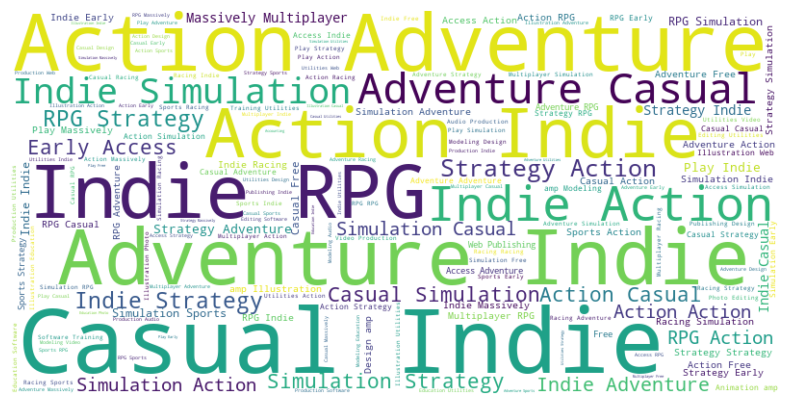

In [9]:
# Concatena todos los valores de la columna 'genres' en una cadena
text = ' '.join(juegos['genres'].astype(str))

# Crea un objeto WordCloud y genera la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Muestra la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

#### Las palabras más prominentes son “Indie”, “Action”, “Adventure”, “RPG”, “Casual” y “Strategy”. Esto sugiere que estos podrían ser los géneros de videojuegos más populares o discutidos.

C:\Users\JAGER\AppData\Local\Temp\ipykernel_8860\3514424918.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top3_generos.values, y=top3_generos.index, palette='viridis')


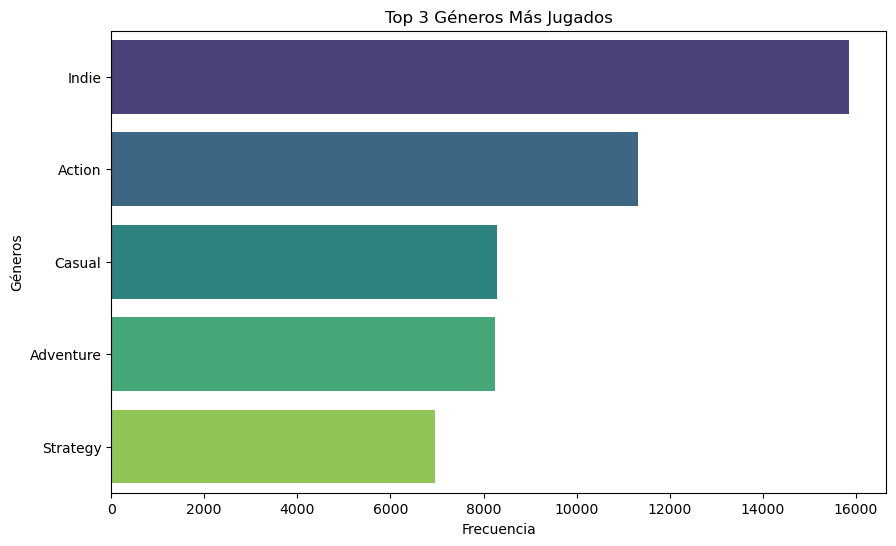

In [11]:


# Obtén los top 3 géneros más jugados
top3_generos = juegos['genres'].value_counts().nlargest(5)

# Crea un gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=top3_generos.values, y=top3_generos.index, palette='viridis')

# Añade etiquetas y título
plt.xlabel('Frecuencia')
plt.ylabel('Géneros')
plt.title('Top 3 Géneros Más Jugados')

# Muestra el gráfico
plt.show()


#### El género más jugado es Indie, con una frecuencia de alrededor de 16000, seguido por Action y Casual, con frecuencias de alrededor de 8000 y 6000 respectivamente. Esto sugiere que los videojuegos de género Indie son los más populares entre los jugadores, seguidos por los de acción y los casuales.

In [37]:
#se contabilizan los diferentes juegos Steam estrenados por año
estreno_por_anio= juegos["release_anio"].value_counts()

estreno_por_anio

release_anio
2017        25199
2016        17693
2015        12272
2014         6367
2013         3017
2012         2107
2011          987
2010          663
2018          499
2009          492
sin dato      338
2008          332
2007          259
2006          217
2005          139
2003          118
2001          109
2004           92
1999           80
1998           75
1997           64
2002           62
1996           56
2000           55
1994           52
1995           49
1993           40
1992           24
1991           22
1990           14
2019           13
1989           11
1988            9
1984            5
1987            5
1986            5
2021            3
5275            3
1983            3
1985            1
Name: count, dtype: int64

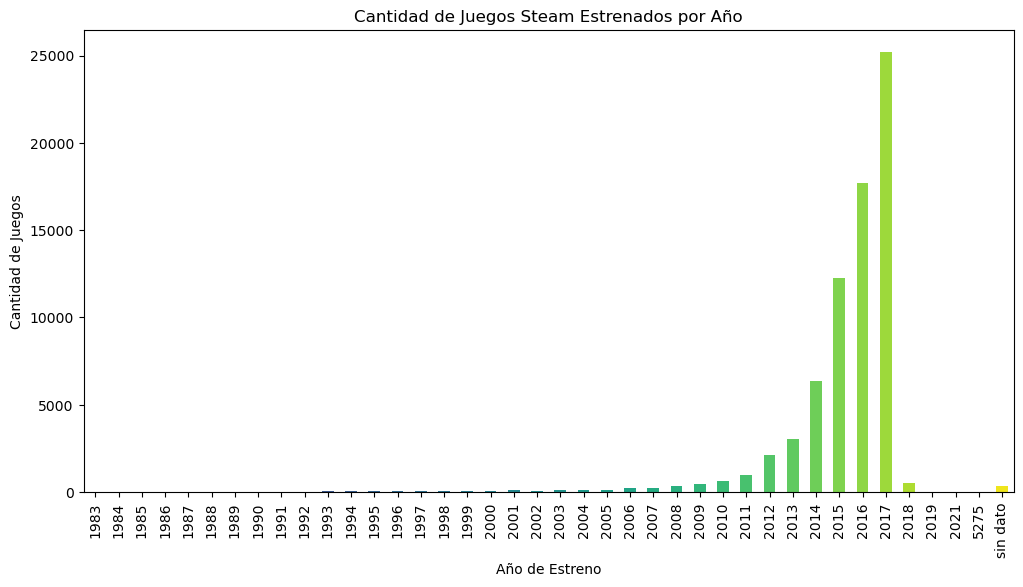

In [39]:
# Utiliza una paleta de colores diferente para cada barra.

colores = sns.color_palette("viridis", len(estreno_por_anio))

plt.figure(figsize=(12, 6))
estreno_por_anio.sort_index().plot(kind='bar', color=colores)
plt.title('Cantidad de Juegos Steam Estrenados por Año')
plt.xlabel('Año de Estreno')
plt.ylabel('Cantidad de Juegos')
plt.show()

#### El año 2017 fue el año con mayor cantidad de juegos estrenados con la cantidad de: 25199

In [41]:
# Calcula la cantidad de juegos desarrollados por cada desarrollador en la columna "developer" del DataFrame "juegos".

desarrolladores = juegos["developer"].value_counts()

desarrolladores

developer
Ubisoft - San Francisco                                                             2516
SmiteWorks USA, LLC                                                                 2364
DL Softworks                                                                         495
Ronimo Games                                                                         379
Sin Datos                                                                            350
                                                                                    ... 
Viron Shake                                                                            1
Fewjix                                                                                 1
Kyuppin                                                                                1
NHLislive                                                                              1
Evan Hatampour,K.Song Tan,Anton Kagounkin Magdalina,Stuart Hwang,Mike VanPeursem       1
Name: count

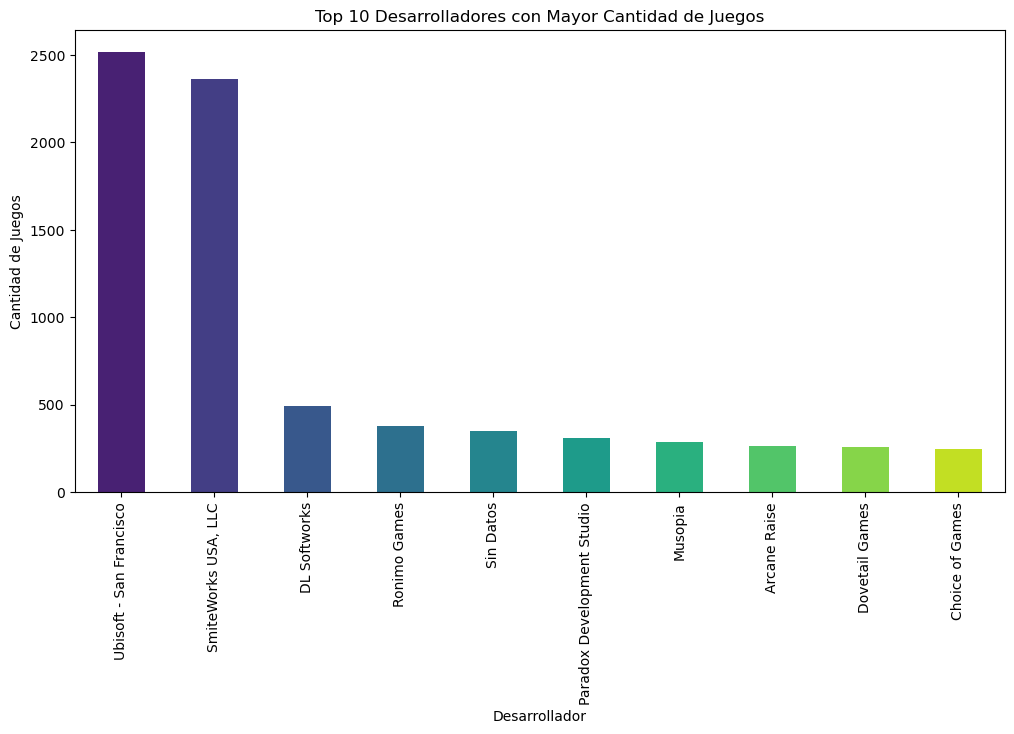

In [42]:
# Selecciona los 10 principales desarrolladores para mostrar en el gráfico.
top10_desarrolladores = desarrolladores.head(10)

# Utiliza una paleta de colores diferente para cada barra.
colores = sns.color_palette("viridis", len(top10_desarrolladores))

# Gráfico de barras para visualizar la cantidad de juegos desarrollados por cada desarrollador (top 10).
plt.figure(figsize=(12, 6))
top10_desarrolladores.plot(kind='bar', color=colores)
plt.title('Top 10 Desarrolladores con Mayor Cantidad de Juegos')
plt.xlabel('Desarrollador')
plt.ylabel('Cantidad de Juegos')
plt.show()

#### Los desarrolladores con mas cantidad de juegos desarrollados en la plataforma son: "Ubisoft - San Francisco" y "SmiteWorks USA, LLC"